In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import sys
from sklearn.metrics import accuracy_score
from sklearn import svm

In [18]:
loan_dataset =pd.read_csv("data/train.csv")

In [19]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
loan_dataset.shape

(614, 13)

In [25]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [27]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
loan_dataset =loan_dataset.dropna()

In [29]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
loan_dataset.shape

(480, 13)

In [34]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [41]:
# Dependent Column Values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [38]:
# replacing the value of 3+ to 4 
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [40]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [42]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

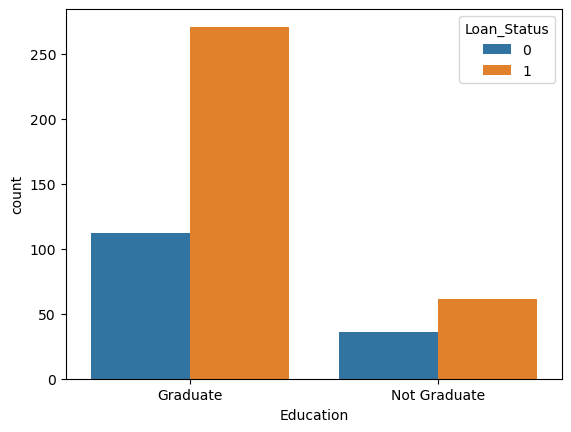

In [44]:
# education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

In [ ]:
# marital status & Loan_Status

<AxesSubplot:xlabel='Married', ylabel='count'>

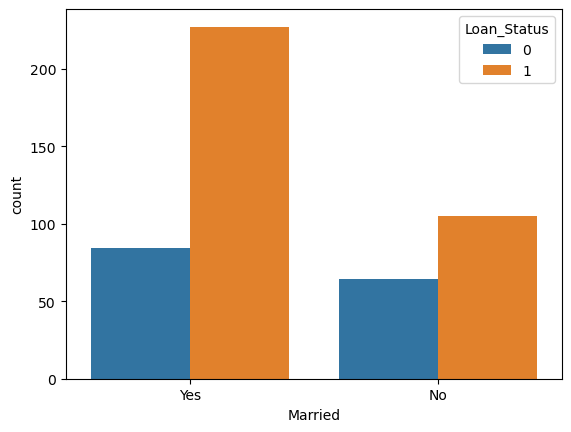

In [45]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [73]:
# convert categorical columns to numerical values
loan_dataset = loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Self_Employed':
                     {'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{
                     'Graduate':1,'Not Graduate':0}})

In [74]:
# separating the data and label
X =loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y =loan_dataset['Loan_Status']

In [75]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [76]:
 X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
    

In [77]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
122       1        0          0          1              0             2137   
498       0        1          1          1              1             2895   
144       0        1          2          1              0            11757   
217       0        1          0          1              0             3727   
362       0        1          0          1              0             4750   
..      ...      ...        ...        ...            ...              ...   
72        0        0          0          1              0             3500   
390       0        0          4          1              0             9167   
76        0        0          0          1              0             3750   
286       1        0          0          1              1             2600   
376       0        1          4          1              0             8750   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [78]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


# Training the model: Support Vector Machine

In [79]:
classifier = svm.SVC(kernel='linear')

In [80]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Modal Evaluation

In [81]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [82]:
print('Accuracy on training data=', training_data_accuracy)

Accuracy on training data= 0.7476851851851852


In [84]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [85]:
print('Accuracy on test data=', test_data_accuracy)

Accuracy on test data= 0.8333333333333334
